In [46]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math
import chatbot_puck as cp
import model_puck as mp
from matplotlib import animation
from functools import partial

c:\Users\ibuku\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Timing bots
choices = ['darkness','shadows','screams','lost']
cgpt_w = ['darkness','dread','silence','whispers','creak','beneath','shadows','eerie']
cgpt_freq = [2,2,1,1,1,1,1]
koala_w = ['darkness','shadows','ominous','alone','haunting','midnight','unsettling','chilling','whispers','shivers']
koala_freq =[1]*10
claud_w = ['screams','midnight','shadows','glimpse','lost']
claud_freq =[1,3,3,2,1]
perp_w = ['nightmare']
perp_freq = [10]
hug_w = ['darkness', 'shadows', 'nightfall', 'solitude', 'whispers', 'unseen', 'veil', 'hushed', 'echoes']
hug_freq = [2,1,1,1,1,1,1,1,1]
pi_w = ['darkness']
pi_freq = [10]

In [8]:
# Timing testing suite
from statistics import mean
times = []
decision = []
for r in range(0,100):
    mp1 = mp.ModelPuck(choices=choices,debug=False)
    cgpt = cp.ChatbotPuck(model=mp1,name = 'cgpt',convic_words=cgpt_w,convic_freq=cgpt_freq,debug=False)
    claud = cp.ChatbotPuck(model =mp1,name = "claud",convic_words=claud_w, convic_freq=claud_freq,debug=False)
    koala = cp.ChatbotPuck(model=mp1,name='koala',convic_words=koala_w,convic_freq=koala_freq)
    perplex = cp.ChatbotPuck(model =mp1,name = "perplex",convic_words=perp_w, convic_freq=perp_freq,debug=False)
    huggingchat = cp.ChatbotPuck(model=mp1,name="huggingchat",convic_words=hug_w, convic_freq=hug_freq)
    pi = cp.ChatbotPuck(model=mp1,name="pi",convic_words=pi_w, convic_freq=pi_freq)
    mp1.set_chatbots([cgpt,claud,koala,perplex,huggingchat,pi])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            cgpt.update()
            claud.update()
            koala.update()
            perplex.update()
            huggingchat.update()
            pi.update()
            done = mp1.update(start)
            if mp1.halt:
                times.append(done[1])
                decision.append(done[0])
                break
print("average time: ",mean(times))
print("Count of 'darkness': ", decision.count('darkness'))
print("Count of 'shadows': ", decision.count('shadows'))
print("Count of 'screams': ", decision.count('screams'))
print("Count of 'lost': ", decision.count('lost'))

average time:  11.553371222019196
Count of 'darkness':  100
Count of 'shadows':  0
Count of 'screams':  0
Count of 'lost':  0


In [ ]:
six_times = mean(times)
# average time:  11.553371222019196
# Count of 'darkness':  100
# Count of 'shadows':  0
# Count of 'screams':  0
# Count of 'lost':  0

In [ ]:
five_times = mean(times)
# average time:  10.522156672477722
# Count of 'darkness':  43
# Count of 'shadows':  56
# Count of 'screams':  1
# Count of 'lost':  0

In [6]:
four_time = mean(times)
# average time:  7.582761054039001
# Count of 'darkness':  31
# Count of 'shadows':  69
# Count of 'screams':  0
# Count of 'lost':  0

In [27]:
three_time = mean(times)
# average time:  5.17298712015152
# Count of 'darkness':  1
# Count of 'shadows':  99
# Count of 'screams':  0
# Count of 'lost':  0

In [24]:
two_time = mean(times)
two_time

2.5151755690574644

Text(0, 0.5, 'Time in Seconds')

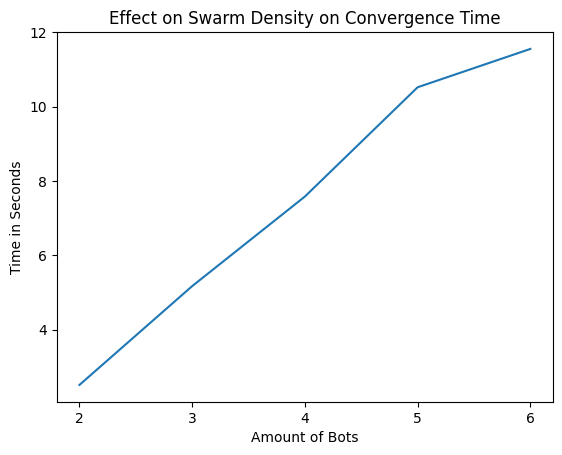

In [9]:
# Timing plot
import matplotlib.pyplot as plt
x = [2,3,4,5,6]
y = [2.5151755690574644,5.17298712015152,7.582761054039001,10.522156672477722,11.553371222019196]
plt.figure
plt.plot(x,y)
plt.title("Effect on Swarm Density on Convergence Time")
plt.xticks(x)
plt.xlabel("Amount of Bots")
plt.ylabel("Time in Seconds")


In [20]:
#  Accuracy Simple
choices = ['one','two','three','four']
bot1_freq = [1,1,1,7]
bot2_freq = [1,7,1,1]
bot3_freq = [1,1,1,1]

In [21]:
# Accuracy Simple
decision = []
for r in range(0,100):
    mp2 = mp.ModelPuck(choices=choices,debug=False)
    bot1 = cp.ChatbotPuck(model=mp2,name = 'bot1',convic_words=choices,convic_freq=bot1_freq)
    bot2 = cp.ChatbotPuck(model=mp2,name = 'bot2',convic_words=choices,convic_freq=bot2_freq)
    bot3 = cp.ChatbotPuck(model=mp2,name = 'bot3',convic_words=choices,convic_freq=bot3_freq)
    mp2.set_chatbots([bot1,bot2,bot3])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            bot1.update()
            bot2.update()
            bot3.update()
            done = mp2.update(start)
            if mp2.halt:
                decision.append(done[0])
                break
print("Count of 'one': ",decision.count('one'))
print("Count of 'two': ", decision.count('two'))
print("Count of 'three': ",decision.count('three'))
print("Count of 'four': ",decision.count('four'))

KeyboardInterrupt: 

In [22]:
len(decision)

68

In [23]:
print("Count of 'one': ",decision.count('one'))
print("Count of 'two': ", decision.count('two'))
print("Count of 'three': ",decision.count('three'))
print("Count of 'four': ",decision.count('four'))

Count of 'one':  0
Count of 'two':  27
Count of 'three':  0
Count of 'four':  41


In [61]:
# Accuracy Complex
choices = ['good','bad','sheep','yellow']
bot1_word = ['great', 'like', 'red', 'blue']
bot1_freq = [1,1,1,1]
bot2_word = ['pink', 'goat', 'heart', 'wallet']
bot2_freq = [1,7,1,1]
bot3_word = ['mattress', 'door','evil', 'car']
bot3_freq = [1,1,7,1]

In [62]:
# Accuracy Comple
decision = []
for r in range(0,100):
    mp3 = mp.ModelPuck(choices=choices,debug=False)
    bot1 = cp.ChatbotPuck(model=mp3,name = 'bot1',convic_words=bot1_word,convic_freq=bot1_freq)
    bot2 = cp.ChatbotPuck(model=mp3,name = 'bot2',convic_words=bot2_word,convic_freq=bot2_freq)
    bot3 = cp.ChatbotPuck(model=mp3,name = 'bot3',convic_words=bot3_word,convic_freq=bot3_freq)
    mp3.set_chatbots([bot1,bot2,bot3])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            bot1.update()
            bot2.update()
            bot3.update()
            done = mp3.update(start)
            if mp3.halt:
                decision.append(done[0])
                break
print("Count of 'good': ",decision.count('good'))
print("Count of 'bad': ", decision.count('bad'))
print("Count of 'sheep': ",decision.count('sheep'))
print("Count of 'yellow': ",decision.count('yellow'))

KeyboardInterrupt: 

In [63]:
print(len(decision))
print("Count of 'good': ",decision.count('good'))
print("Count of 'bad': ", decision.count('bad'))
print("Count of 'sheep': ",decision.count('sheep'))
print("Count of 'yellow': ",decision.count('yellow'))

13
Count of 'good':  0
Count of 'bad':  8
Count of 'sheep':  5
Count of 'yellow':  0


In [65]:
# Shakespearan humanity responses
choices = ['mortality','dirt','poverty','greed']
cgpt_w = ['putrescence','foulness','decay','putridity','corrruption','rankness','pestilence','putrefaction', 'loathsome decay', 'abhorence']
cgpt_freq = [1]*10
koala_w = ['foulness', 'rankness','putridness','filth','pestilence','corruption','putrefaction','rot','rank','foul']
koala_freq =[1]*10
claud_w = ['fetid','rankness','putrescence','malodorousness','foulness','putridity', 'fetor','stenchfulness']
claud_freq =[3,1,1,1,1,1,1,1]

In [70]:
from statistics import mean
decision = []
for r in range(0,100):
    mp4 = mp.ModelPuck(choices=choices,debug=False)
    cgpt = cp.ChatbotPuck(model=mp4,name = 'cgpt',convic_words=cgpt_w,convic_freq=cgpt_freq,debug=False)
    claud = cp.ChatbotPuck(model =mp4,name = "claud",convic_words=claud_w, convic_freq=claud_freq,debug=False)
    koala = cp.ChatbotPuck(model=mp4,name='koala',convic_words=koala_w,convic_freq=koala_freq)
    mp4.set_chatbots([cgpt,claud,koala])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            cgpt.update()
            claud.update()
            koala.update()
            done = mp4.update(start)
            if mp4.halt:
                decision.append(done[0])
                break
print(len(decision))
print("Count of 'mortality': ", decision.count('mortality'))
print("Count of 'dirt': ", decision.count('dirt'))
print("Count of 'poverty': ", decision.count('poverty'))
print("Count of 'greed': ", decision.count('greed'))

KeyboardInterrupt: 

In [71]:
print(len(decision))
print("Count of 'mortality': ", decision.count('mortality'))
print("Count of 'dirt': ", decision.count('dirt'))
print("Count of 'poverty': ", decision.count('poverty'))
print("Count of 'greed': ", decision.count('greed'))

87
Count of 'mortality':  0
Count of 'dirt':  87
Count of 'poverty':  0
Count of 'greed':  0


In [2]:
import pandas
d1 = pandas.read_json('./train.jsonl',lines=True)

In [26]:
import random
a = []
for i in range(0,20):
    a.append(random.randint(0,len(d1)))


In [20]:
questions = []
answers = []
for i in a:
    index = i
    while len(d1.iloc[index]['answers']['raw'].keys()) < 4:
        index= random.randint(0,500)
    questions.append(d1.iloc[index]['question']['original'])
    answers.append(d1.iloc[index]['answers']['raw'])

In [40]:

list(answers[2].keys())[0:4]

['cheap restaurant', 'hospital', 'school', 'convenience stores']

In [76]:
# Name An Occupation Where People Are Paid To Tell Others What To Do (More Specific Than Boss).
choices = list(answers[0].keys())[0:4]
cgpt_w = ['coordinator','supervisor','manager','director','team leader']
cgpt_freq = [1,3,3,1,2]
koala_w = ['supervisor', 'foreman', 'manager','management consultant','team leader']
koala_freq =[4,3,1,1,1]
claud_w = ['chief of police', 'sous chef', 'drum major', 'choir director', 'judge', 'cruise director', 'foreman', 'manager']
claud_freq =[1,1,1,1,1,1,1,3]
c = questions[0]


In [77]:
decision = []
cgpt_c = None
claud_c = None
koala_c = None
for r in range(0,20):
    mp5 = mp.ModelPuck(choices=choices,debug=False)
    cgpt = cp.ChatbotPuck(model=mp5,name = 'cgpt',convic_words=cgpt_w,convic_freq=cgpt_freq,debug=False)
    cgpt_c = cgpt.choice
    claud = cp.ChatbotPuck(model =mp5,name = "claud",convic_words=claud_w, convic_freq=claud_freq,debug=False)
    claud_c = claud.choice
    koala = cp.ChatbotPuck(model=mp5,name='koala',convic_words=koala_w,convic_freq=koala_freq)
    koala_c = koala.choice
    mp5.set_chatbots([cgpt,claud,koala])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            cgpt.update()
            claud.update()
            koala.update()
            done = mp5.update(start)
            if mp5 .halt:
                decision.append(done[0])
                break
print(c)
print(len(decision))
for c in choices:
    print("Decision count of ",c,": ", decision.count(c))
print('-------------------------------------------------')
print('CGPT CHOICE: ', cgpt_c)
print('CLAUD CHOICE: ', claud_c)
print('KOALA CHOICE: ',koala_c)

Name An Occupation Where People Are Paid To Tell Others What To Do (More Specific Than Boss). 
20
Decision count of  doctor :  20
Decision count of  lawyer :  0
Decision count of  fitness trainer :  0
Decision count of  accountant/broker :  0
-------------------------------------------------
CGPT CHOICE:  doctor
CLAUD CHOICE:  doctor
KOALA CHOICE:  doctor


In [78]:
# Name A Reason Why It’s Harder To Get Out Of Bed On Some Days Than On Others.
choices = list(answers[1].keys())[0:4]
cgpt_w = ['lack of sleep', 'fatigue','stress', 'lack of motivation', 'despression','weather','illness','emotional distress','lack of energy','sleeping inconsistencies']
cgpt_freq = [1]*10
koala_w = ['exhaustion']
koala_freq =[10]
claud_w = ['lack of sleep', 'weekends', 'hormonal changes', 'weather', 'depression', 'lack of motivaton', 'illness', 'tiredness', 'comfort']
claud_freq =[1,1,1,1,1,1,1,2,1]
c= questions[1]

In [79]:
decision = []
cgpt_c = None
claud_c = None
koala_c = None
for r in range(0,20):
    mp5 = mp.ModelPuck(choices=choices,debug=False)
    cgpt = cp.ChatbotPuck(model=mp5,name = 'cgpt',convic_words=cgpt_w,convic_freq=cgpt_freq,debug=False)
    cgpt_c = cgpt.choice
    claud = cp.ChatbotPuck(model =mp5,name = "claud",convic_words=claud_w, convic_freq=claud_freq,debug=False)
    claud_c = claud.choice
    koala = cp.ChatbotPuck(model=mp5,name='koala',convic_words=koala_w,convic_freq=koala_freq)
    koala_c = koala.choice
    mp5.set_chatbots([cgpt,claud,koala])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            cgpt.update()
            claud.update()
            koala.update()
            done = mp5.update(start)
            if mp5 .halt:
                decision.append(done[0])
                break
print(c)
print(len(decision))
for c in choices:
    print("Decision count of ",c,": ", decision.count(c))
print('-------------------------------------------------')
print('CGPT CHOICE: ', cgpt_c)
print('CLAUD CHOICE: ', claud_c)
print('KOALA CHOICE: ',koala_c)

Name A Reason Why It’s Harder To Get Out Of Bed On Some Days Than On Others. 
20
Decision count of  tired :  20
Decision count of  sick :  0
Decision count of  bad weather :  0
Decision count of  going to work/school :  0
-------------------------------------------------
CGPT CHOICE:  tired
CLAUD CHOICE:  tired
KOALA CHOICE:  tired


In [80]:
# `Name a kind of place that's known for serving really bad food. `
choices = list(answers[2].keys())[0:4]
cgpt_w = ['dive diner', 'fast food', 'gas station', 'cafeteria','school', 'microwave meal restaurant', 'dollar store cafe', 'truck stop diner']
cgpt_freq = [1,2,1,1,2,1,1,1]
koala_w = ['fast food', 'school', 'prison', 'airline', 'hospital', 'tourist trap', 'roadside diner', 'budget buffets']
koala_freq =[1,1,2,1,2,1,1,1]
claud_w = ['prison', 'fast food', 'hospital', 'school', 'cheap buffets', 'airplanes','baseball stadium', 'movie theater', 'retirement homes']
claud_freq =[1,1,1,1,2,1,1,1,1]
c = questions[2]

In [81]:
decision = []
cgpt_c = None
claud_c = None
koala_c = None
for r in range(0,20):
    mp5 = mp.ModelPuck(choices=choices,debug=False)
    cgpt = cp.ChatbotPuck(model=mp5,name = 'cgpt',convic_words=cgpt_w,convic_freq=cgpt_freq,debug=False)
    cgpt_c = cgpt.choice
    claud = cp.ChatbotPuck(model =mp5,name = "claud",convic_words=claud_w, convic_freq=claud_freq,debug=False)
    claud_c = claud.choice
    koala = cp.ChatbotPuck(model=mp5,name='koala',convic_words=koala_w,convic_freq=koala_freq)
    koala_c = koala.choice
    mp5.set_chatbots([cgpt,claud,koala])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            cgpt.update()
            claud.update()
            koala.update()
            done = mp5.update(start)
            if mp5 .halt:
                decision.append(done[0])
                break
print(c)
print(len(decision))
for c in choices:
    print("Decision count of ",c,": ", decision.count(c))
print('-------------------------------------------------')
print('CGPT CHOICE: ', cgpt_c)
print('CLAUD CHOICE: ', claud_c)
print('KOALA CHOICE: ',koala_c)

Name a kind of place that's known for serving really bad food. 
20
Decision count of  cheap restaurant :  0
Decision count of  hospital :  10
Decision count of  school :  10
Decision count of  convenience stores :  0
-------------------------------------------------
CGPT CHOICE:  school
CLAUD CHOICE:  cheap restaurant
KOALA CHOICE:  hospital


In [82]:
# Name A Food That Can be Eaten Directly From Its Container.
choices = list(answers[3].keys())[0:4]
cgpt_w = ['yogurt', 'ice cream', 'hummus', 'peanut butter', 'salsa', 'cottage cheese', 'fruit cups','pudding']
cgpt_freq = [2,1,2,1,1,1,1,1]
koala_w = ['ice cream', 'yogurt']
koala_freq =[3,7]
claud_w = ['chips', 'yogurt', 'apples','celery sticks', 'granola bars','candy', 'deli meat', 'bananas', 'cheerios']
claud_freq =[1,2,1,1,1,1,1,1,1]
c = questions[3]

In [83]:
decision = []
cgpt_c = None
claud_c = None
koala_c = None
for r in range(0,20):
    mp5 = mp.ModelPuck(choices=choices,debug=False)
    cgpt = cp.ChatbotPuck(model=mp5,name = 'cgpt',convic_words=cgpt_w,convic_freq=cgpt_freq,debug=False)
    cgpt_c = cgpt.choice
    claud = cp.ChatbotPuck(model =mp5,name = "claud",convic_words=claud_w, convic_freq=claud_freq,debug=False)
    claud_c = claud.choice
    koala = cp.ChatbotPuck(model=mp5,name='koala',convic_words=koala_w,convic_freq=koala_freq)
    koala_c = koala.choice
    mp5.set_chatbots([cgpt,claud,koala])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            cgpt.update()
            claud.update()
            koala.update()
            done = mp5.update(start)
            if mp5 .halt:
                decision.append(done[0])
                break
print(c)
print(len(decision))
for c in choices:
    print("Decision count of ",c,": ", decision.count(c))
print('-------------------------------------------------')
print('CGPT CHOICE: ', cgpt_c)
print('CLAUD CHOICE: ', claud_c)
print('KOALA CHOICE: ',koala_c)

Name A Food That Can be Eaten Directly From Its Container. 
20
Decision count of  ice cream :  0
Decision count of  yogurt :  20
Decision count of  chips :  0
Decision count of  tuna :  0
-------------------------------------------------
CGPT CHOICE:  yogurt
CLAUD CHOICE:  yogurt
KOALA CHOICE:  yogurt


In [84]:
# Name A Fruit Put In Margaritas
choices = list(answers[4].keys())[0:4]
cgpt_w = ['lime', 'orange', 'mango', 'strawberry' ]
cgpt_freq = [7,1,1,1]
koala_w = ['lime']
koala_freq =[10]
claud_w = ['lime','lemon','orange','pineapple','strawberry','peach','mango','watermelon','raspberry']
claud_freq =[2,1,1,1,1,1,1,1,1]
c = questions[4]

In [85]:
decision = []
cgpt_c = None
claud_c = None
koala_c = None
for r in range(0,20):
    mp5 = mp.ModelPuck(choices=choices,debug=False)
    cgpt = cp.ChatbotPuck(model=mp5,name = 'cgpt',convic_words=cgpt_w,convic_freq=cgpt_freq,debug=False)
    cgpt_c = cgpt.choice
    claud = cp.ChatbotPuck(model =mp5,name = "claud",convic_words=claud_w, convic_freq=claud_freq,debug=False)
    claud_c = claud.choice
    koala = cp.ChatbotPuck(model=mp5,name='koala',convic_words=koala_w,convic_freq=koala_freq)
    koala_c = koala.choice
    mp5.set_chatbots([cgpt,claud,koala])
    start = time.time()
    for i in range(0,100000):
        if(i>0):
            cgpt.update()
            claud.update()
            koala.update()
            done = mp5.update(start)
            if mp5 .halt:
                decision.append(done[0])
                break
print(c)
print(len(decision))
for c in choices:
    print("Decision count of ",c,": ", decision.count(c))
print('-------------------------------------------------')
print('CGPT CHOICE: ', cgpt_c)
print('CLAUD CHOICE: ', claud_c)
print('KOALA CHOICE: ',koala_c)

Name A Fruit Put In Margaritas
20
Decision count of  lime :  20
Decision count of  strawberries :  0
Decision count of  lemon :  0
Decision count of  pinapple :  0
-------------------------------------------------
CGPT CHOICE:  lime
CLAUD CHOICE:  lime
KOALA CHOICE:  lime
